# Finding Shortest Path in a Graph using Q-Learning Algorithm

__Graphs__ are mathematical structures used to model pairwise relations between objects. A graph is made up of vertices which are connected by edges. In an undirected graph, I will find shortest path between two nodes.*(1)

__Q-learning__ is a model-free _reinforcement learning_ algorithm. The goal of Q-learning is to learn a policy, which tells an agent what action to take under what circumstances. It does not require a model of the environment, and it can handle problems with stochastic transitions and rewards, without requiring adaptations.*(2)



First I import necessary modules. I will use _networkx_ library to define a Graph 

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline

Let's define and visualize the Graph

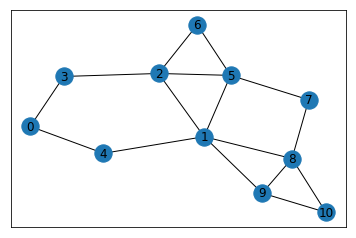

In [2]:
edges = [(0,4),(4,0),(0,3),(3,0),(1,2),(2,1),(1,4),(4,1),(1,8),(8,1),(1,9),(9,1),(2,3),(3,2),(2,6),(6,2),
(1,5),(5,1),(2,5),(5,2),(5,6),(6,5),(7,8),(8,7),(7, 5), (5, 7), (8, 9), (9, 8), (8, 10), (10, 8),(9, 10), (10, 9)]
G = nx.Graph() 
G.add_edges_from(edges) 
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos) 
nx.draw_networkx_edges(G, pos) 
nx.draw_networkx_labels(G, pos) 
plt.show()

Q-learning algorithm involves an agent, a set of states and a set of actions per state. By performing an action
the agent transitions from state to state. Executing an action in a specific state provides the agent with a reward.
The goal of the agent is to maximize its total (future) reward*(3)

<br>Matematically,

Q values can be calculated using the (Bellman) equation:
<br>Q(s,a)<=(1-α)Q(s,a) + α(R(s,a)+γmaxQ(s',a'))
where 
 - Q(s,a) is the Q value of an action a from state s to s'
 - α is the learning rate
 - R(s,a) is the reward of doing action a from state s to s'
 - γ is the discount factor
 - maxQ(s',a') is the max Q value among all possible actions a' in the next state s'
 

__I want to find shortest path from 0 to 10.__ I need to attract walks to edges involving 10, therefore I give these actions high reward. 

Here I initialize Reward and Q matrix:

In [3]:
R = np.matrix(np.zeros(shape=(11, 11)))
for node in G.nodes:
    for x in G[node]:
        if node==10:
            R[x,node]=100


In [4]:
Q= np.matrix(np.zeros(shape=(11, 11)))
Q-=100
for node in G.nodes:
    for x in G[node]:
        Q[node,x]=0
        Q[x,node]=0 

I set all rewards 0 except the actions arriving node 10. These actions are going from 8 to 10 or 9 to 10. Like Rewards, Q-values are initialized in a matrix. To eleminate impossible actions, their Q-values are set -100. For example, in the graph, it is not possible to go directly from 2 to 10, therefore its Q-value set as -100. Possible actions are initialized as 0. Let's take a look at the R and Q matrices:


In [5]:
import pandas as pd
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [6]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,0.0,0.0,-100.0
2,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0


Now I'll define a function which takes a starting node and returns the next node. It also accepts an exploration rate for random exploration. Otherwise it chooses action according to the highest Q value of the possible actions. 

In [7]:
import random
def next_number(start,er):
    random_value = random.uniform(0, 1) #chooses a random number between 0 and 1 
    if random_value<er: # if the random number is below the treshold, it chooses next action randomly 
        sample=G[start]    
    else:
        sample=np.where(Q[start,] == np.max(Q[start,]))[1]
    next_node= int(np.random.choice(sample,1))
    return next_node

Now, we need a function for updating Q-value of the action taken

In [8]:
def updateQ(node1,node2,lr,discount):
    max_index = np.where(Q[node2,] == np.max(Q[node2,]))[1] # finds the index of the highest Q-value
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[node2, max_index]
    Q[node1, node2] = int((1-lr)*Q[node1, node2]+lr*(R[node1, node2] + discount * max_value)) # updates the Q-value using Bellman equation



Now it is time to improve  Q-values by making 50000 walk

In [9]:
def learn(er,lr,discount):
    for i in range(50000):
            start = np.random.randint(0, 11)
            next_node=next_number(start,er)
            updateQ(start,next_node,lr,discount)
        

learn(0.5,0.8,0.8) # I set exploration rate, learning rate and discount factor of the learning

Let's check the final Q-values

In [10]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,110.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,138.0,-100.0,138.0,138.0,-100.0,-100.0,218.0,218.0,-100.0
2,-100.0,174.0,-100.0,110.0,-100.0,138.0,110.0,-100.0,-100.0,-100.0,-100.0
3,110.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,110.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,174.0,138.0,-100.0,-100.0,-100.0,110.0,174.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,138.0,-100.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,138.0,-100.0,-100.0,218.0,-100.0,-100.0
8,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,174.0,-100.0,218.0,274.0
9,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,218.0,-100.0,274.0


Now we can find shortest path between 0 and 10, by choosing highest Q-value from Q matrix when deciding an action:

In [11]:
def shortest_path(begin,end):
    path=[begin]
    next_node= np.argmax(Q[begin,])
    path.append(next_node)
    while next_node != end:
        next_node= np.argmax(Q[next_node,])
        path.append(next_node)
    return path


Shortest Path between 0 and 10 is

In [12]:
shortest_path(0,10)

[0, 4, 1, 8, 10]

(1) https://en.wikipedia.org/wiki/Graph_theory
<br>(2)(3) https://everything.explained.today/Q-learning/   